<a href="https://colab.research.google.com/github/babakkeshavarz/time_series/blob/main/Arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 65.3 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.5
    Uninstalling statsmodels-0.13.5:
      Successfully uninstalled statsmodels-0.13.5


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

--2023-06-27 14:27:04--  https://lazyprogrammer.me/course_files/airline_passengers.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2036 (2.0K) [text/csv]
Saving to: ‘airline_passengers.csv’

airline_passengers. 100%[===================>]   1.99K  --.-KB/s    in 0s      

2023-06-27 14:27:04 (34.1 MB/s) - ‘airline_passengers.csv’ saved [2036/2036]



In [19]:
df = pd.read_csv('airline_passengers.csv', index_col= 'Month' , parse_dates= True)

In [20]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [21]:
df['1st_diff'] = df['Passengers'].diff()

<Axes: xlabel='Month'>

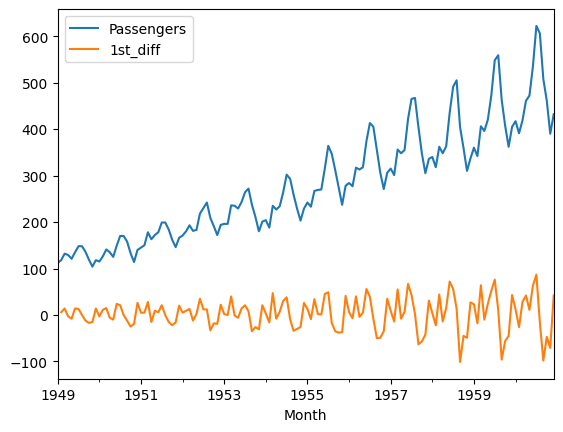

In [22]:
df.plot()

<Axes: xlabel='Month'>

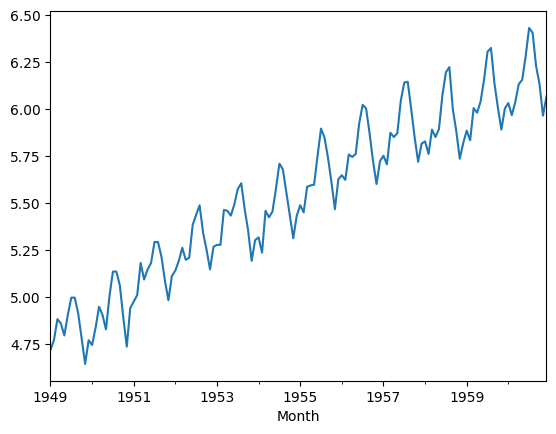

In [24]:
df['Log_Passengers'] = np.log(df['Passengers'])
df['Log_Passengers'].plot()

In [25]:
from statsmodels.tsa.arima.model import ARIMA

In [37]:
df.index.freq = 'MS'
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [38]:
#### boolean series to index df rows
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [39]:
arima = ARIMA(train['Passengers'] , order = (1,0,0))
arima_result = arima.fit()

In [42]:
df.loc[train_idx , 'AR(1)'] = arima_result.predict(
                                                   start= train.index[0] ,
                                                   end = train.index[-1])

<Axes: xlabel='Month'>

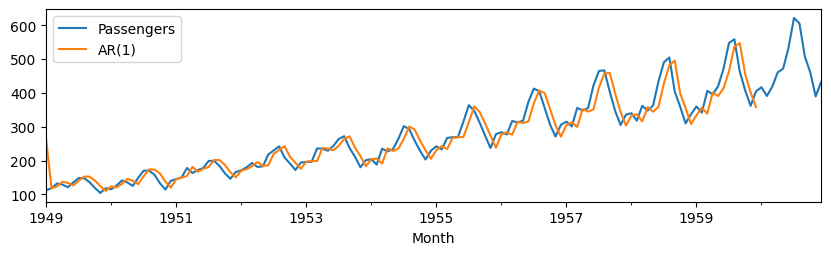

In [47]:
df[['Passengers' , 'AR(1)']].plot(figsize = (10,2.5))

In [49]:
prediction_results = arima_result.get_forecast(Ntest)
forecast = prediction_results.predicted_mean
df.loc[test_idx , 'AR(1)'] = forecast

<Axes: xlabel='Month'>

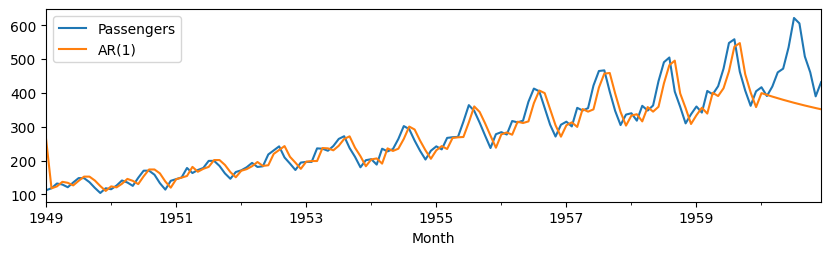

In [50]:
df[['Passengers' , 'AR(1)']].plot(figsize = (10,2.5))

<Axes: xlabel='Month'>

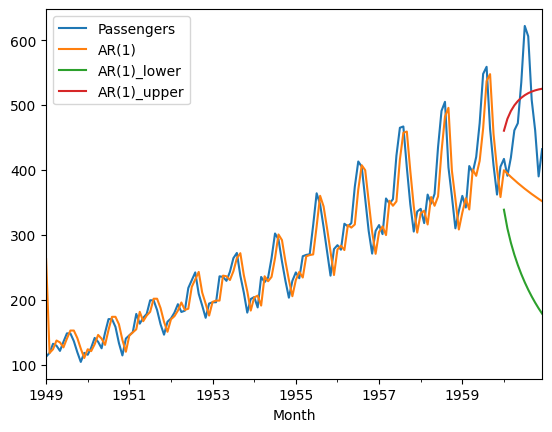

In [55]:
prediction_results = arima_result.get_forecast(Ntest)
forecast = prediction_results.predicted_mean
df.loc[test_idx , 'AR(1)'] = forecast
### Confidence intervals
df.loc[test_idx , 'AR(1)_lower'] = prediction_results.conf_int()['lower Passengers']
df.loc[test_idx , 'AR(1)_upper'] = prediction_results.conf_int()['upper Passengers']

df[['Passengers' , 'AR(1)' , 'AR(1)_lower' , 'AR(1)_upper']].plot()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

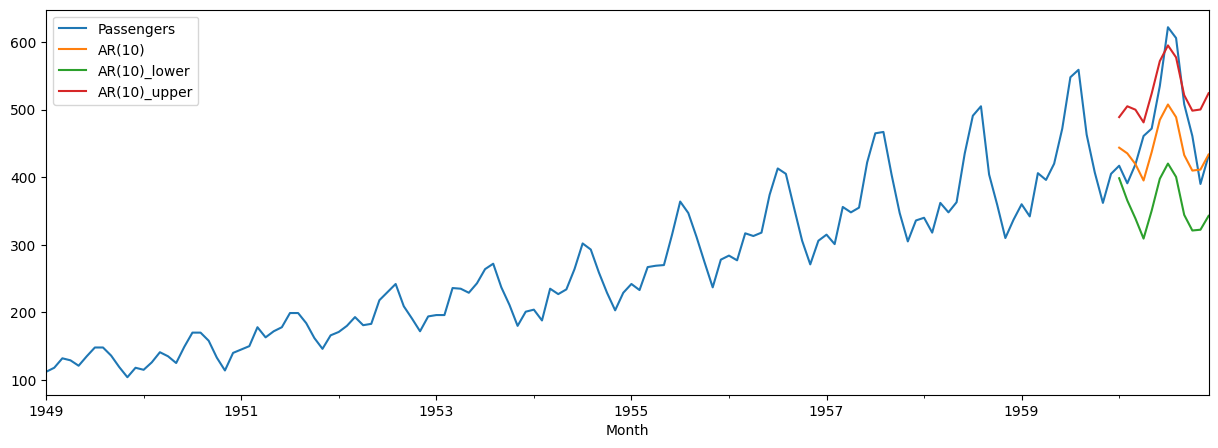

In [58]:
arima = ARIMA(train['Passengers'] , order = (10,0,0))
arima_result = arima.fit()
prediction_results = arima_result.get_forecast(Ntest)
forecast = prediction_results.predicted_mean
df.loc[test_idx , 'AR(10)'] = forecast
### Confidence intervals
df.loc[test_idx , 'AR(10)_lower'] = prediction_results.conf_int()['lower Passengers']
df.loc[test_idx , 'AR(10)_upper'] = prediction_results.conf_int()['upper Passengers']

df[['Passengers' , 'AR(10)' , 'AR(10)_lower' , 'AR(10)_upper']].plot(figsize = (15,5))